[View in Colaboratory](https://colab.research.google.com/github/meethariprasad/phd/blob/master/Data_Science_Class.ipynb)

# Data Science Notebook.

This is Hari Prasad and I am creating this notebook for the learning purpose of beginers. It works only on Iris dataset and covers regressions, classifications using classical models to advanced deep learning models. Regression cases are explained in the begining but there onwards it will not be explored as much as multiclass classification and left for the learner to playaround to change target variables and convert the problem to find say, sepal length.

Objective is to get kick started with quick and dirty, means: Just get the data and apply the algorithm and predict the code. As I develop this notebook further, I am planning to introduce the proper structure of data science project.

##Python Basics
If you have no clue about Python or programming language watch this simple tutorial series. It is multivideo series so please watch all videos in youtube.

In [63]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/Z1Yd7upQsXY" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

##Data Science Process Followed

In [64]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/nKW8Ndu7Mjw" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

1. Gathering data
2. Preparing that data
3. Choosing a model
4. Training
5. Evaluation
6. Hyperparameter tuning
7. Prediction.



## 1. Gathering Data



The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

Source: https://en.wikipedia.org/wiki/Iris_flower_data_set

Iris Flower Images. I have stored them in https://github.com/meethariprasad/phd/raw/master/datascience/class_files.zip


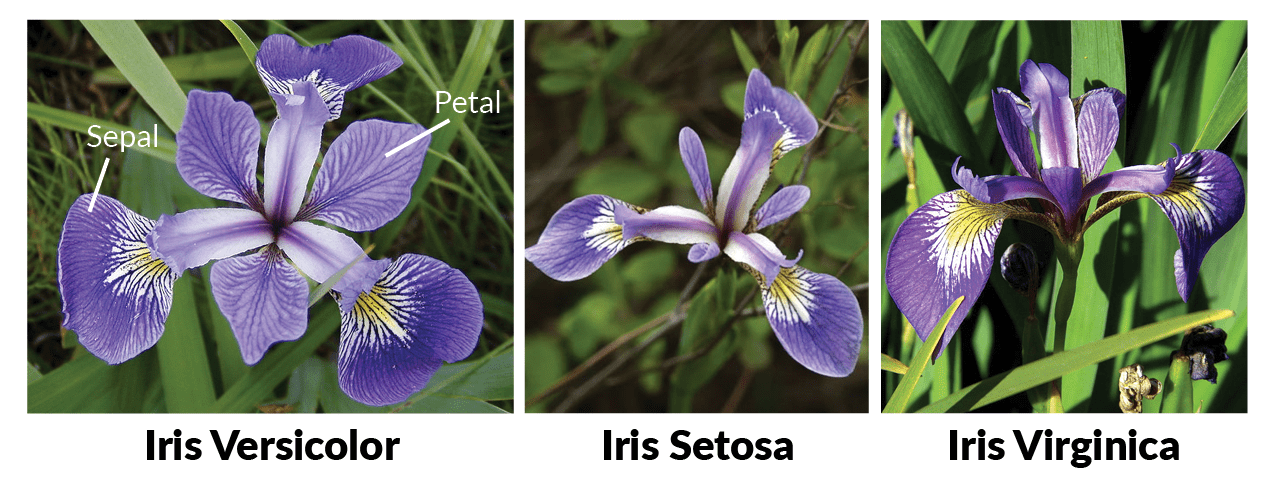

In [65]:
import requests, zipfile, io, os
#https://github.com/meethariprasad/phd/raw/master/assignments/NLP/Translation/hin.zip
r = requests.get("https://github.com/meethariprasad/phd/raw/master/datascience/class_files.zip")
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
#os.listdir()
from IPython.display import Image
PATH = os.getcwd()
PATH=PATH+"/"
Image(filename = PATH + "iris.png")

**Basics of Pandas for the beginers. Thanks to Google!**

In [66]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/XDAnFZqJDvI" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

##Load Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

##Load Data

In [0]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [0]:
# sklearn provides the iris species as integer values since this is required for classification
# here we're just adding a column with the species names to the dataframe for visualisation
df['species'] = np.array([iris.target_names[i] for i in iris.target])

##Preparing Data


**Descriptive Analysis**

Ask some questions to data to understand the data.

**How many rows and columns are there in the data?**

Action Items:

*   Is it too less rows? Collect more data.
*   Is it too many rows to handle in memory? Think of infrastructure changes needed. How about designing stratergy to go for train in batches?
*   Too less columns? Collect More features
*   Too many columns? First think if you think some columns are redundant based on domain knowledge, write down your reasoning and remove them. Still too many columns? Think about dimensionality reduction.











In [70]:
print("Rows in data:",df.shape[0],"Columns in Data:",df.shape[1])

Rows in data: 150 Columns in Data: 5


**What are the column names & data types of columns? **

Action Items:
*  Do we need to change column name? change them to simple column names.
*   Do we need to change the data types of columns? Better to keep everything in to numerics. If they are not convert it.: df[['colname1', 'colname2']] = df[['colname1', 'colname2']].astype(float). 
*  Do we have a string based categorical column? Change it to codes.pd.Categorical(df.cc)



In [71]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [0]:
#Change columns to simpler ones
df.rename(columns={df.columns[0]: 'slen',df.columns[1]: 'swidth',df.columns[2]: 'plen',df.columns[3]: 'pwidth'}, inplace=True)

In [81]:
#Change Datatype if required
print(df.dtypes)

slen       float64
swidth     float64
plen       float64
pwidth     float64
species       int8
dtype: object


In [84]:
df.species=pd.Categorical(df.species)
print(df.dtypes)
df.species=df.species.cat.codes
#It converts to int. So maintaining Category Datatype as is.
df.species=pd.Categorical(df.species)

slen        float64
swidth      float64
plen        float64
pwidth      float64
species    category
dtype: object
slen        float64
swidth      float64
plen        float64
pwidth      float64
species    category
dtype: object


 **What is the count of missing values in each column?**
 
 Action point:
 
 

1.   Have you found too many missing values in a column, say more than 30%? Is it even worth to consider the column?
2.  If less than  30% think about imputing stratergies to implement? How about using random forest based predictive imputation like missforest? Note: As of now we don't have known python library to do that. Think about: https://pandas.pydata.org/pandas-docs/stable/r_interface.html in case you want to use r library in python.
Following material is good and simple on missing value handling in python.
https://chrisalbon.com/python/data_wrangling/pandas_missing_data/


In [87]:
print("Watch this to understand advanced methods for missing data imputation and their pros/cons:")
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/QAvSj2TWZy0" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

Watch this to understand advanced methods for missing data imputation and their pros/cons:


In [59]:
print("Count of the Null Values in each column \n",df.isnull().sum())

Count of the Null Values 
 slen       0
swidth     0
plen       0
pwidth     0
species    0
dtype: int64


**Plots**

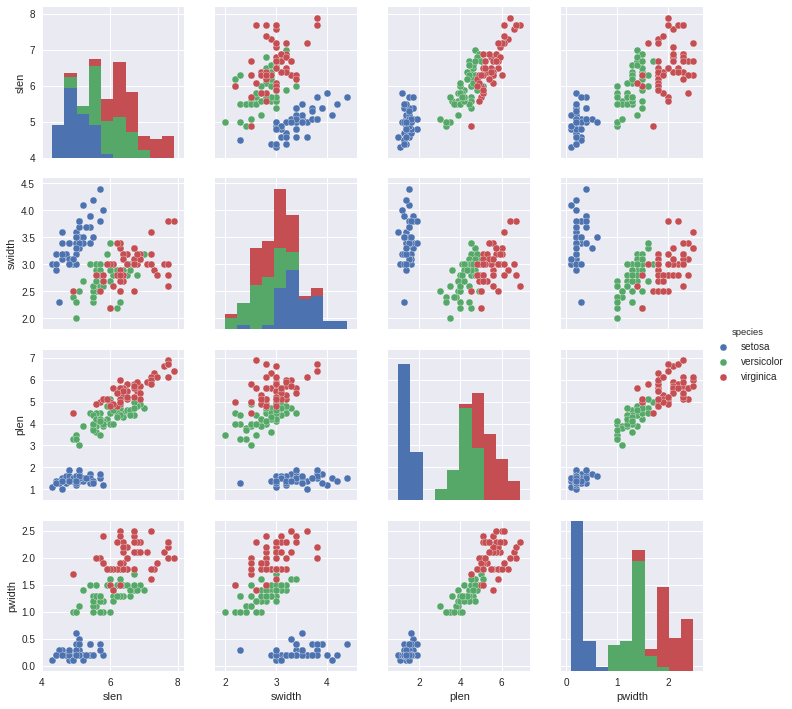

In [60]:
sns.pairplot(df, hue='species')

**Analysis Based on Plot above**

# Analysis: 
1. Can you see that setosa is clearely stands out from rest? In fact you can get 100% accuracy to identify Setosa, even doing manual seperation!

2.  There is overlap between "V" species, that too it is minor, So it shows we can have classifiers seperating the classes with good accuracy


**Statistical Analysis**

In [125]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], iris.target, test_size=0.5, stratify=iris.target, random_state=123456)

##Choosing a model

One of the way to select a model is following the below cheat-sheet. But we will be going with traditional way more as intention is to cover many algorithms.

In [10]:
from IPython.display import Image
Image(url = "http://scikit-learn.org/stable/_static/ml_map.png",width=1000, height=1000)

**Baseline Prediction for Classes based on Logistic Regression** 

We will compare the performance of the rest of classifiers based on this.

**Logistic Regression by Andrew**

In [193]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/-33XCqO2ezU" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

**Multiclass Classification Techniques**

In [191]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/6kzvrq-MIO0" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

In [0]:
#We will have random_state = 7 always for reproducibility
random_seed=7

In [0]:
#Logistic Regresion using Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
model_logistic=SGDClassifier(loss='log',max_iter=1000,random_state=random_seed)
model_logistic.fit(X_train, y_train)
predicted_logistic=model_logistic.predict(X_test)

**Metrics**

We will be using F1 Score instead of Accuracy. Reason, F1 Score is a god measure irrespective of data is balanced or imbalanced.

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. 

The formula for the F1 score is:
F1 = 2 * (precision * recall) / (precision + recall)

In the multi-class and multi-label case, this is the weighted average of the F1 score of each class.

In [195]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/HBi-P5j0Kec" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

Accuracy Percentage of Logistic Regrssion using SGD 94.67
F1 Score of Logistic Regrssion using SGD 0.9466666666666667


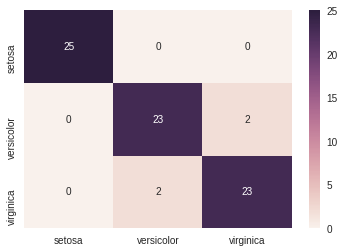

In [199]:
from sklearn.metrics import accuracy_score,f1_score
print( "Accuracy Percentage of Logistic Regrssion using SGD",round(accuracy_score(y_test,predicted_logistic)*100,2))
print( "F1 Score of Logistic Regrssion using SGD",f1_score(y_test,predicted_logistic,average='macro'))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predicted_logistic), columns=iris.target_names, index=iris.target_names)
sns.heatmap(cm, annot=True)

**Random Forest: Classification**

In [200]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/ajTc5y3OqSQ" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

In [171]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10000, oob_score=True, random_state=random_seed)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
            oob_score=True, random_state=7, verbose=0, warm_start=False)

Out-of-bag score estimate: 0.973
F1 0.93


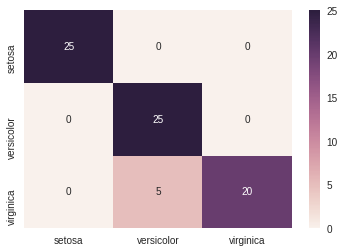

In [203]:
from sklearn.metrics import f1_score
predicted = rf.predict(X_test)
accuracy = f1_score(y_test, predicted,average="micro")
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print('F1',round(accuracy,2))
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=iris.target_names, index=iris.target_names)
sns.heatmap(cm, annot=True)

**Support Vector Machine**

In [186]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/N1vOgolbjSc" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

In [0]:
from sklearn.svm import SVC
# ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model_svc = SVC(kernel='rbf')
model_svc.fit(X_train,y_train)
confusion_matrix(y_test,model_svc.predict(X_test))

array([[25,  0,  0],
       [ 0, 24,  1],
       [ 0,  3, 22]])

**Naive Bayes**

In [207]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/sjUDlJfdnKM" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

In [0]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d"
      % (iris.data.shape[0],(iris.target != y_pred).sum()))

Number of mislabeled points out of a total 150 points : 6


**K Means Clustering**

In [205]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/RD0nNK51Fp8" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

In [183]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# sklearn provides the iris species as integer values since this is required for classification
# here we're just adding a column with the species names to the dataframe for visualisation
df['species'] = np.array([iris.target_names[i] for i in iris.target])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], iris.target, test_size=0.5, stratify=iris.target, random_state=123456)
from sklearn.cluster import KMeans
Kmean_model=KMeans(n_clusters=3,random_state=0,max_iter=100)
Kmean_model.fit(X_train,y_train)
predicted=Kmean_model.predict(X_train)
print("Real Labels",y_train,"\n Predicted Cluster, find the label based on analysis, Don't do one-one mapping with real labels \n",predicted)

Real Labels [1 1 2 2 0 2 2 0 2 2 1 1 0 1 1 1 0 2 2 0 0 0 1 0 0 0 1 2 2 1 0 0 0 0 2 2 1
 2 0 2 2 2 0 1 2 1 2 0 0 0 2 2 0 0 1 1 1 0 1 1 1 2 0 1 0 2 1 0 1 1 2 2 1 1
 2] 
 Predicted Cluster, find the label based on analysis, Don't do one-one mapping with real labels 
 [2 2 0 0 1 0 0 1 0 0 2 2 1 2 2 2 1 0 2 1 1 1 2 1 1 1 2 2 2 2 1 1 1 1 0 0 2
 0 1 0 0 0 1 2 0 0 0 1 1 1 0 0 1 1 2 2 2 1 2 2 2 0 1 2 1 0 2 1 2 2 0 0 2 2
 2]


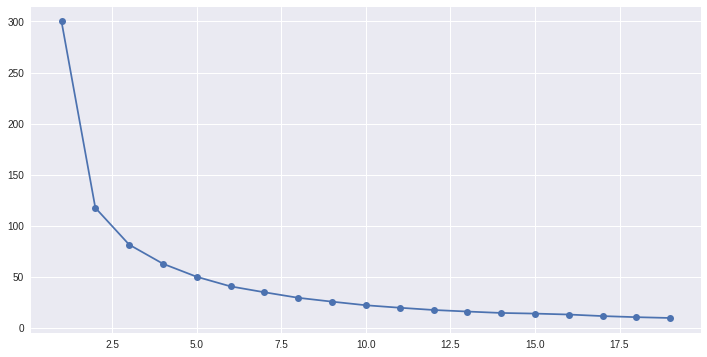

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn
%matplotlib inline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X_train )

#Finding cluster size by elbow method.
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  Kmean_model = KMeans( num_clusters,random_state=0)
  Kmean_model.fit( X_scaled )
  cluster_errors.append( Kmean_model.inertia_ )

clusters_df  = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [0]:
Kmean_model = KMeans( 3,random_state=0)
Kmean_model.fit( X_scaled )
df_labels=pd.DataFrame(Kmean_model.labels_)
df_labels.columns=["predicted_clusters"]
df_real=pd.DataFrame(y_train)
df_real.columns=["Actual"]
df_real.groupby("Actual").size(),df_labels.groupby("predicted_clusters").size()

(Actual
 0    25
 1    25
 2    25
 dtype: int64, predicted_clusters
 0    34
 1    24
 2    17
 dtype: int64)

In [0]:
#How to get top 10 indexes which are near ones to cluster centroid.
#Kmean_model.transform(X_scaled)[:, cluster_number]
d = Kmean_model.transform(X_scaled)[:, 0]
ind = np.argsort(d)[::][:10]
ind,X_scaled[ind]

(array([70,  8, 37, 45, 71, 65, 50, 40, 44, 46]),
 array([[ 0.74740053, -0.22909306,  0.79603503,  1.003211  ],
        [ 0.74740053, -0.22909306,  0.96612799,  0.74375988],
        [ 0.62633133,  0.01992114,  0.96612799,  0.74375988],
        [ 0.98953893, -0.22909306,  0.68263973,  0.61403432],
        [ 0.74740053,  0.26893533,  0.73933738,  1.003211  ],
        [ 0.74740053, -0.22909306,  1.13622094,  1.26266212],
        [ 1.23167733,  0.01992114,  0.73933738,  1.39238768],
        [ 0.62633133,  0.26893533,  0.85273268,  1.39238768],
        [ 0.98953893,  0.01992114,  1.02282564,  1.52211324],
        [ 0.98953893,  0.51794953,  1.07952329,  1.13293656]]))

##Work in Progress from here onwards

In [0]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:GPU:0']


In [7]:
#Change the directory.
import os
os.getcwd()

'/content'

In [0]:
#path="Z:\\Documents\\Machine Learning"
os.chdir(PATH)

In [0]:
#Import file with header.
from pandas import read_csv
data=read_csv("iris.csv")

In [10]:
data.shape

(150, 5)

In [11]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
cat              object
dtype: object

In [0]:
#One hot code encoding of categorical variable cat.
import pandas as pd
one_hot=pd.get_dummies(data.cat)

In [13]:
df=data.join(one_hot)
df.dtypes
#What does dtype at the end signifies?

sepal_length       float64
sepal_width        float64
petal_length       float64
petal_width        float64
cat                 object
Iris-setosa          uint8
Iris-versicolor      uint8
Iris-virginica       uint8
dtype: object

In [0]:
#Drop Categorical columns
df=df.drop('cat',axis=1)

In [15]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,0.333333,0.333333,0.333333
std,0.828066,0.433594,1.764420,0.763161,0.472984,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [0]:
#For Regression let us predict sepal_length from other variables.
from sklearn.linear_model import LinearRegression

In [0]:
#Create Model.
model=LinearRegression()

In [0]:
#Create Features and Target Dataframes.
array = df.values

In [19]:
df.dtypes

sepal_length       float64
sepal_width        float64
petal_length       float64
petal_width        float64
Iris-setosa          uint8
Iris-versicolor      uint8
Iris-virginica       uint8
dtype: object

In [0]:
#Our Prediction column is at 0 th index and all other (1 till 7th) are our predictors columns
X=array[:,1:7]
Y=array[:,0]

In [0]:
#Split the data in to train and test sets.
test_size = 0.33
seed = 7
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

In [22]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
#Parameters Learnt
print('Coefficients: \n', model.coef_)

Coefficients: 
 [ 0.5909224   0.7962453  -0.28641615  0.4916739  -0.09938941 -0.3922845 ]


In [24]:
print(model.predict(X_test))
y_pred = model.predict(X_test)

[6.31902086 6.22009361 4.90233254 6.22009361 5.57445409 4.19322566
 6.59768397 5.86122653 5.11075551 6.33827809 6.56093303 6.42782096
 5.47341827 7.2693283  4.95150645 6.49122684 6.58093137 6.69661122
 5.34712447 4.88249587 5.65099456 6.77174444 6.34889205 5.85258325
 6.9336758  6.08014727 6.05903554 5.42273492 6.11310252 6.60438606
 5.96196279 5.33068743 4.75119281 6.53106184 6.05903554 4.68649587
 4.93097416 5.42855801 4.98195707 6.87009225 6.88811991 6.36942434
 6.48439257 6.63751898 6.06714487 4.89241421 6.22820294 5.49244112
 6.27235158 4.99257103]


In [25]:
#Mean Squared error
from sklearn.metrics import mean_squared_error
print("Mean squared error:", mean_squared_error(Y_test, y_pred))

Mean squared error: 0.10177034686835107


In [26]:
from sklearn.metrics import r2_score
# Explained variance score: 1 is perfect prediction
print('Variance score:',r2_score(Y_test, y_pred))

Variance score: 0.8194908320237266


In [27]:
#Logistic Regression
#We will predict the class of flower and then we will check the accuracy.
#We have to make it cat
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
cat              object
dtype: object

In [0]:
data["cat"] = data["cat"].astype('category')

In [29]:
data.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
cat             category
dtype: object

In [0]:
#import pandas as pd
#data.cat = pd.Categorical(data.cat).codes

In [0]:
#Create Features and Target Dataframes.
array_log = data.values

In [32]:
data.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
cat             category
dtype: object

In [0]:
#Our Prediction column is at 4 th index and all other (0 till 5th) are our predictors columns
#From 0 coulmn I want 4 columns
X=array_log[:,0:4]
Y=array_log[:,4]

In [0]:
#For Regression let us predict sepal_length from other variables.
from sklearn.linear_model import LogisticRegression

In [0]:
model_log=LogisticRegression(multi_class="ovr")

In [0]:
#Split the data in to train and test sets.
test_size = 0.33
seed = 7
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

In [37]:
model_log.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
print(model_log.predict(X_test))
y_pred = model_log.predict(X_test)

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa']


In [39]:
Y_test

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa'], dtype=objec

In [40]:
#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.9

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred,labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

array([[14,  0,  0],
       [ 0, 14,  4],
       [ 0,  1, 17]])

In [42]:
#Accuracy Report
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred,target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.93      0.78      0.85        18
 Iris-virginica       0.81      0.94      0.87        18

    avg / total       0.91      0.90      0.90        50



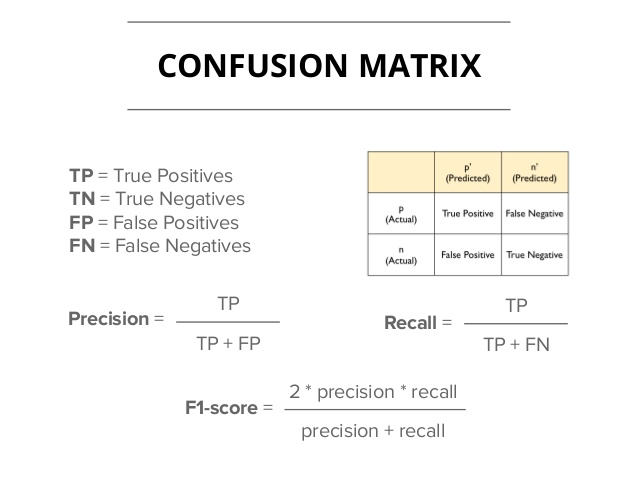

In [43]:
Image(filename = PATH + "pr2.jpg")

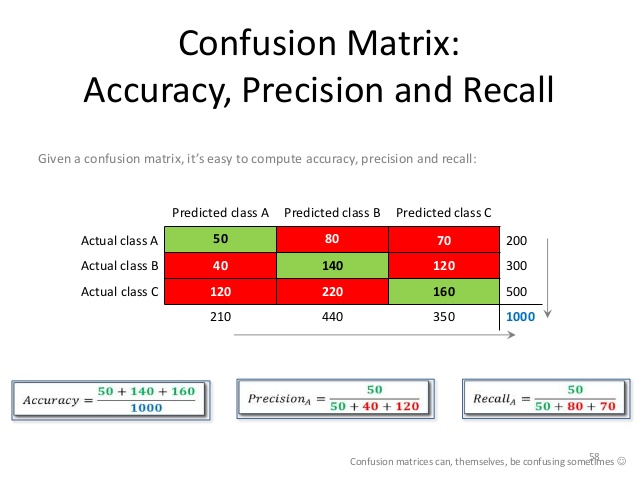

In [44]:
Image(filename = PATH + "pr.jpg")

In [45]:
#Deep Learning
#	4 inputs -> [8 hidden nodes] -> 3 outputs
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [0]:
#Create Features and Target Dataframes.
array = df.values

In [47]:
array.shape

(150, 7)

In [48]:
df.dtypes

sepal_length       float64
sepal_width        float64
petal_length       float64
petal_width        float64
Iris-setosa          uint8
Iris-versicolor      uint8
Iris-virginica       uint8
dtype: object

In [0]:
#Our Prediction column is at 0 th index and all other (1 till 7th) are our predictors columns
X=array[:,0:4]
Y=array[:,4:7]

In [0]:
#Split the data in to train and test sets.
test_size = 0.33
seed = 7
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

In [51]:
#Dimensions of Input_dim (Number of features) and Output Dimension(Y dimension).
X.shape[1],Y.shape[1]

(4, 3)

In [0]:
#Baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [53]:
model=baseline_model()
model.fit(X_train, Y_train,epochs=200,batch_size=5)

Epoch 1/200
100/100 [==============================] - 1s 12ms/step - loss: 1.5305 - acc: 0.3200
Epoch 2/200
100/100 [==============================] - 0s 1ms/step - loss: 1.3754 - acc: 0.3200
Epoch 3/200
100/100 [==============================] - 0s 1ms/step - loss: 1.2550 - acc: 0.3200
Epoch 4/200
100/100 [==============================] - 0s 1ms/step - loss: 1.1638 - acc: 0.3200
Epoch 5/200
100/100 [==============================] - 0s 1ms/step - loss: 1.1002 - acc: 0.3300
Epoch 6/200
100/100 [==============================] - 0s 1ms/step - loss: 1.0568 - acc: 0.3900
Epoch 7/200
100/100 [==============================] - 0s 1ms/step - loss: 1.0218 - acc: 0.4900
Epoch 8/200
100/100 [==============================] - 0s 1ms/step - loss: 0.9915 - acc: 0.6200
Epoch 9/200
100/100 [==============================] - 0s 1ms/step - loss: 0.9612 - acc: 0.6400
Epoch 10/200
100/100 [==============================] - 0s 1ms/step - loss: 0.9327 - acc: 0.6700
Epoch 11/200
100/100 [================

100/100 [==============================] - 0s 1ms/step - loss: 0.6586 - acc: 0.7000
Epoch 23/200
100/100 [==============================] - 0s 1ms/step - loss: 0.6417 - acc: 0.7200
Epoch 24/200
100/100 [==============================] - 0s 1ms/step - loss: 0.6250 - acc: 0.7500
Epoch 25/200
100/100 [==============================] - 0s 1ms/step - loss: 0.6084 - acc: 0.7900
Epoch 26/200
100/100 [==============================] - 0s 1ms/step - loss: 0.5935 - acc: 0.8200
Epoch 27/200
100/100 [==============================] - 0s 1ms/step - loss: 0.5784 - acc: 0.8200
Epoch 28/200
100/100 [==============================] - 0s 1ms/step - loss: 0.5644 - acc: 0.8400
Epoch 29/200
100/100 [==============================] - 0s 1ms/step - loss: 0.5506 - acc: 0.8500
Epoch 30/200
100/100 [==============================] - 0s 1ms/step - loss: 0.5378 - acc: 0.8500
Epoch 31/200
100/100 [==============================] - 0s 1ms/step - loss: 0.5248 - acc: 0.8500
Epoch 32/200
100/100 [=====================

100/100 [==============================] - 0s 1ms/step - loss: 0.4065 - acc: 0.9300
Epoch 44/200
100/100 [==============================] - 0s 1ms/step - loss: 0.3979 - acc: 0.9400
Epoch 45/200
100/100 [==============================] - 0s 2ms/step - loss: 0.3919 - acc: 0.9600
Epoch 46/200
100/100 [==============================] - 0s 2ms/step - loss: 0.3830 - acc: 0.9400
Epoch 47/200
100/100 [==============================] - 0s 1ms/step - loss: 0.3763 - acc: 0.9700
Epoch 48/200
100/100 [==============================] - 0s 2ms/step - loss: 0.3686 - acc: 0.9700
Epoch 49/200
100/100 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9600
Epoch 50/200
100/100 [==============================] - 0s 2ms/step - loss: 0.3553 - acc: 0.9700
Epoch 51/200
100/100 [==============================] - 0s 1ms/step - loss: 0.3496 - acc: 0.9600
Epoch 52/200
100/100 [==============================] - 0s 1ms/step - loss: 0.3476 - acc: 0.9600
Epoch 53/200
100/100 [=====================

100/100 [==============================] - 0s 1ms/step - loss: 0.2762 - acc: 0.9900
Epoch 65/200
100/100 [==============================] - 0s 1ms/step - loss: 0.2724 - acc: 0.9900
Epoch 66/200
100/100 [==============================] - 0s 1ms/step - loss: 0.2688 - acc: 0.9800
Epoch 67/200
100/100 [==============================] - 0s 1ms/step - loss: 0.2667 - acc: 0.9900
Epoch 68/200
100/100 [==============================] - 0s 1ms/step - loss: 0.2576 - acc: 0.9800
Epoch 69/200
100/100 [==============================] - 0s 1ms/step - loss: 0.2555 - acc: 0.9800
Epoch 70/200
100/100 [==============================] - 0s 1ms/step - loss: 0.2507 - acc: 0.9800
Epoch 71/200
100/100 [==============================] - 0s 2ms/step - loss: 0.2465 - acc: 0.9900
Epoch 72/200
100/100 [==============================] - 0s 1ms/step - loss: 0.2438 - acc: 0.9800
Epoch 73/200
100/100 [==============================] - 0s 2ms/step - loss: 0.2383 - acc: 0.9900
Epoch 74/200
100/100 [=====================

100/100 [==============================] - 0s 2ms/step - loss: 0.1997 - acc: 0.9800
Epoch 86/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1969 - acc: 0.9800
Epoch 87/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1947 - acc: 0.9800
Epoch 88/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1932 - acc: 0.9800
Epoch 89/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1887 - acc: 0.9800
Epoch 90/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1886 - acc: 0.9900
Epoch 91/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1845 - acc: 0.9800
Epoch 92/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1823 - acc: 0.9800
Epoch 93/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1805 - acc: 0.9900
Epoch 94/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1770 - acc: 0.9800
Epoch 95/200
100/100 [=====================

100/100 [==============================] - 0s 1ms/step - loss: 0.1548 - acc: 0.9800
Epoch 107/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1513 - acc: 0.9800
Epoch 108/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1514 - acc: 0.9800
Epoch 109/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1476 - acc: 0.9800
Epoch 110/200
100/100 [==============================] - 0s 2ms/step - loss: 0.1474 - acc: 0.9900
Epoch 111/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1476 - acc: 0.9800
Epoch 112/200
100/100 [==============================] - 0s 2ms/step - loss: 0.1438 - acc: 0.9900
Epoch 113/200
100/100 [==============================] - 0s 2ms/step - loss: 0.1422 - acc: 0.9800
Epoch 114/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1416 - acc: 0.9900
Epoch 115/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1419 - acc: 0.9800
Epoch 116/200
100/100 [===========

100/100 [==============================] - 0s 1ms/step - loss: 0.1243 - acc: 0.9800
Epoch 128/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1227 - acc: 0.9800
Epoch 129/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1235 - acc: 0.9800
Epoch 130/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1229 - acc: 0.9900
Epoch 131/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1214 - acc: 0.9800
Epoch 132/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1190 - acc: 0.9800
Epoch 133/200
100/100 [==============================] - 0s 2ms/step - loss: 0.1175 - acc: 0.9800
Epoch 134/200
100/100 [==============================] - 0s 2ms/step - loss: 0.1170 - acc: 0.9800
Epoch 135/200
100/100 [==============================] - 0s 2ms/step - loss: 0.1160 - acc: 0.9800
Epoch 136/200
100/100 [==============================] - 0s 2ms/step - loss: 0.1160 - acc: 0.9800
Epoch 137/200
100/100 [===========

100/100 [==============================] - 0s 2ms/step - loss: 0.1067 - acc: 0.9900
Epoch 149/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1100 - acc: 0.9800
Epoch 150/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1035 - acc: 0.9800
Epoch 151/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1031 - acc: 0.9800
Epoch 152/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1027 - acc: 0.9800
Epoch 153/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1055 - acc: 0.9800
Epoch 154/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0995 - acc: 0.9800
Epoch 155/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1021 - acc: 0.9800
Epoch 156/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0996 - acc: 0.9800
Epoch 157/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0992 - acc: 0.9800
Epoch 158/200
100/100 [===========

100/100 [==============================] - 0s 1ms/step - loss: 0.0915 - acc: 0.9800
Epoch 170/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0927 - acc: 0.9800
Epoch 171/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0908 - acc: 0.9800
Epoch 172/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0918 - acc: 0.9800
Epoch 173/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0897 - acc: 0.9800
Epoch 174/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0904 - acc: 0.9800
Epoch 175/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0890 - acc: 0.9900
Epoch 176/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0895 - acc: 0.9800
Epoch 177/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0885 - acc: 0.9800
Epoch 178/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0867 - acc: 0.9800
Epoch 179/200
100/100 [===========

100/100 [==============================] - 0s 1ms/step - loss: 0.0835 - acc: 0.9800
Epoch 191/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0841 - acc: 0.9800
Epoch 192/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0823 - acc: 0.9800
Epoch 193/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0838 - acc: 0.9800
Epoch 194/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0803 - acc: 0.9800
Epoch 195/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0809 - acc: 0.9800
Epoch 196/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0796 - acc: 0.9800
Epoch 197/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0796 - acc: 0.9800
Epoch 198/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0791 - acc: 0.9800
Epoch 199/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0800 - acc: 0.9800
Epoch 200/200
100/100 [===========

In [54]:
results = model.evaluate(X_test, Y_test)

50/50 [==============================] - 0s 806us/step


In [55]:
print ( "Accuracy",results[1])

Accuracy 0.94


In [56]:
import numpy as np
predictions=np.round(model.predict(X_test))
predictions.shape

(50, 3)

In [57]:
predictions[0:2]

array([[0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [58]:
Y_test[0:2]

array([[0., 0., 1.],
       [0., 1., 0.]])

### Label ranking average precision

Multioutput Classification Metrics.
http://scikit-learn.org/stable/modules/model_evaluation.html#multilabel-ranking-metrics

The label_ranking_average_precision_score function implements label ranking average precision (LRAP). This metric is linked to the average_precision_score function, but is based on the notion of label ranking instead of precision and recall.

Label ranking average precision (LRAP) is the average over each ground truth label assigned to each sample, of the ratio of true vs. total labels with lower score. This metric will yield better scores if you are able to give better rank to the labels associated with each sample. The obtained score is always strictly greater than 0, and the best value is 1. If there is exactly one relevant label per sample, label ranking average precision is equivalent to the mean reciprocal rank.

In [59]:
#Multioutput Classification Metrics.
#http://scikit-learn.org/stable/modules/model_evaluation.html#multilabel-ranking-metrics
from sklearn.metrics import label_ranking_average_precision_score
print(label_ranking_average_precision_score(Y_test, predictions))

0.96


In [0]:
#Tensorflow
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf

In [61]:
Image(url ="https://isaacchanghau.github.io/images/deeplearning/activationfunction/softmax.png")

In [62]:
##Courtesy: https://www.linkedin.com/pulse/artificial-intelligence-how-do-neural-networks-work-better-vignali
Image(url ="https://i.stack.imgur.com/vPTf6.png")

In [63]:
Image(url ="https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAo6AAAAJGNlNjZhZDhiLTNjNzktNGVmOS1iZGZlLWE1MmY5NWI5ODBmOQ.png")

In [64]:

Image(url ="https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAA2eAAAAJDY1ZWRkNmU5LThkNmQtNGU1YS1iNmUzLWEwNDc1NzE3MTJhMQ.png")

In [65]:
Image(url ="https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAvOAAAAJDIzMGRiZGI3LTA1MzQtNDk1ZS1iZGIxLWY4Y2FkMWQ0MTQwYg.png")

In [66]:
Image(url ="https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAqgAAAAJGU3YTkzNjM4LTk3YjYtNGE2Mi1iMTIyLTQ3MGU0YzNiMDc1Mw.png")

In [0]:
# Session
sess = tf.Session()

In [0]:
# Interval / Epochs
interval = 50
epoch = 500

In [0]:
# Initialize placeholders
X_data = tf.placeholder(shape=[None, 4], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 3], dtype=tf.float32)

In [0]:
# Input neurons : 4
# Hidden neurons : 8
# Output neurons : 3
hidden_layer_nodes = 8

# Create variables for Neural Network layers
w1 = tf.Variable(tf.random_normal(shape=[4,hidden_layer_nodes])) # Inputs -> Hidden Layer
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))   # First Bias
w2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes,3])) # Hidden layer -> Outputs
b2 = tf.Variable(tf.random_normal(shape=[3]))   # Second Bias

In [0]:
# Operations
hidden_output = tf.nn.relu(tf.add(tf.matmul(X_data, w1), b1))
final_output = tf.nn.softmax(tf.add(tf.matmul(hidden_output, w2), b2))

### Defining Cross Entropy Loss

In [72]:
Image(url = "https://theneuralperspective.files.wordpress.com/2016/10/screen-shot-2016-11-06-at-8-13-41-pm.png?w=620")

In [73]:
Image(url="https://image.slidesharecdn.com/gentlestintrototensorflowpart3-160629045311/95/gentlest-introduction-to-tensorflow-part-3-71-638.jpg?cb=1486266200")

In [0]:
# Cost Function
loss = tf.reduce_mean(-tf.reduce_sum(y_target * tf.log(final_output), axis=0))

In [0]:
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [0]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [77]:
# Training
print('Training the model...')
for i in range(1, (epoch + 1)):
    sess.run(optimizer, feed_dict={X_data: X_train, y_target: Y_train})
    if i % interval == 0:
        print('Epoch', i, '|', 'Loss:', sess.run(loss, feed_dict={X_data: X_train, y_target: Y_train}))

Training the model...
Epoch 50 | Loss: 13.406583
Epoch 100 | Loss: 10.107925
Epoch 150 | Loss: 7.8182397
Epoch 200 | Loss: 6.429816
Epoch 250 | Loss: 5.497827
Epoch 300 | Loss: 4.8509808
Epoch 350 | Loss: 4.389517
Epoch 400 | Loss: 4.0424943
Epoch 450 | Loss: 3.7730396
Epoch 500 | Loss: 3.5579128


In [78]:
# Prediction
import numpy as np
print()
for i in range(len(X_test)):
    print('Actual:', Y_test[i], 'Predicted:', np.rint(sess.run(final_output, feed_dict={X_data: [X_test[i]]})))


Actual: [0. 0. 1.] Predicted: [[0. 0. 1.]]
Actual: [0. 1. 0.] Predicted: [[0. 1. 0.]]
Actual: [1. 0. 0.] Predicted: [[1. 0. 0.]]
Actual: [0. 1. 0.] Predicted: [[0. 1. 0.]]
Actual: [0. 0. 1.] Predicted: [[0. 0. 1.]]
Actual: [1. 0. 0.] Predicted: [[1. 0. 0.]]
Actual: [0. 1. 0.] Predicted: [[0. 1. 0.]]
Actual: [0. 1. 0.] Predicted: [[0. 1. 0.]]
Actual: [1. 0. 0.] Predicted: [[1. 0. 0.]]
Actual: [0. 1. 0.] Predicted: [[0. 1. 0.]]
Actual: [0. 1. 0.] Predicted: [[0. 1. 0.]]
Actual: [0. 1. 0.] Predicted: [[0. 1. 0.]]
Actual: [1. 0. 0.] Predicted: [[1. 0. 0.]]
Actual: [0. 0. 1.] Predicted: [[0. 0. 1.]]
Actual: [1. 0. 0.] Predicted: [[1. 0. 0.]]
Actual: [0. 1. 0.] Predicted: [[0. 1. 0.]]
Actual: [0. 0. 1.] Predicted: [[0. 0. 1.]]
Actual: [0. 0. 1.] Predicted: [[0. 0. 1.]]
Actual: [1. 0. 0.] Predicted: [[1. 0. 0.]]
Actual: [1. 0. 0.] Predicted: [[1. 0. 0.]]
Actual: [0. 1. 0.] Predicted: [[0. 1. 0.]]
Actual: [0. 0. 1.] Predicted: [[0. 0. 1.]]
Actual: [0. 1. 0.] Predicted: [[0. 1. 0.]]
Actual: [0

In [0]:
predicted_tf=(np.rint(sess.run(final_output, feed_dict={X_data: X_test})))

In [80]:
#Multioutput Classification Metrics.
#http://scikit-learn.org/stable/modules/model_evaluation.html#multilabel-ranking-metrics
from sklearn.metrics import label_ranking_average_precision_score
print(label_ranking_average_precision_score(Y_test, predicted_tf))

1.0


## Decision Tree

http://www.ke.tu-darmstadt.de/lehre/archiv/ws0809/mldm/dt.pdf

## Ref: http://www.saedsayad.com/decision_tree.htm

Decision tree builds classification or regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy). Leaf node (e.g., Play) represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

In [81]:
Image(url="http://www.saedsayad.com/images/Decision_Tree_1.png")

In [0]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [86]:
# https://pypi.python.org/pypi/pydot
#Setting up graphviz (2.38.0-16ubuntu2) ...
#Processing triggers for libc-bin (2.26-0ubuntu2.1) ...
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot
!pip3 install graphviz
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

In [88]:
#iris.feature_names
#['sepal length (cm)',
# 'sepal width (cm)',
# 'petal length (cm)',
# 'petal width (cm)']
petal_length=iris.data[:,2]
np.sort(petal_length)

array([1. , 1.1, 1.2, 1.2, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4,
       1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.6, 1.6,
       1.6, 1.6, 1.6, 1.6, 1.6, 1.7, 1.7, 1.7, 1.7, 1.9, 1.9, 3. , 3.3,
       3.3, 3.5, 3.5, 3.6, 3.7, 3.8, 3.9, 3.9, 3.9, 4. , 4. , 4. , 4. ,
       4. , 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.4, 4.4, 4.4,
       4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.7,
       4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9,
       5. , 5. , 5. , 5. , 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2,
       5.2, 5.3, 5.3, 5.4, 5.4, 5.5, 5.5, 5.5, 5.6, 5.6, 5.6, 5.6, 5.6,
       5.6, 5.7, 5.7, 5.7, 5.8, 5.8, 5.8, 5.9, 5.9, 6. , 6. , 6.1, 6.1,
       6.1, 6.3, 6.4, 6.6, 6.7, 6.7, 6.9])

How split happens in case of continuous attributes can be learnt from: [link text](http://www.cedar.buffalo.edu/~srihari/CSE574/Chap16/Chap16.2-DataSets.pdf)

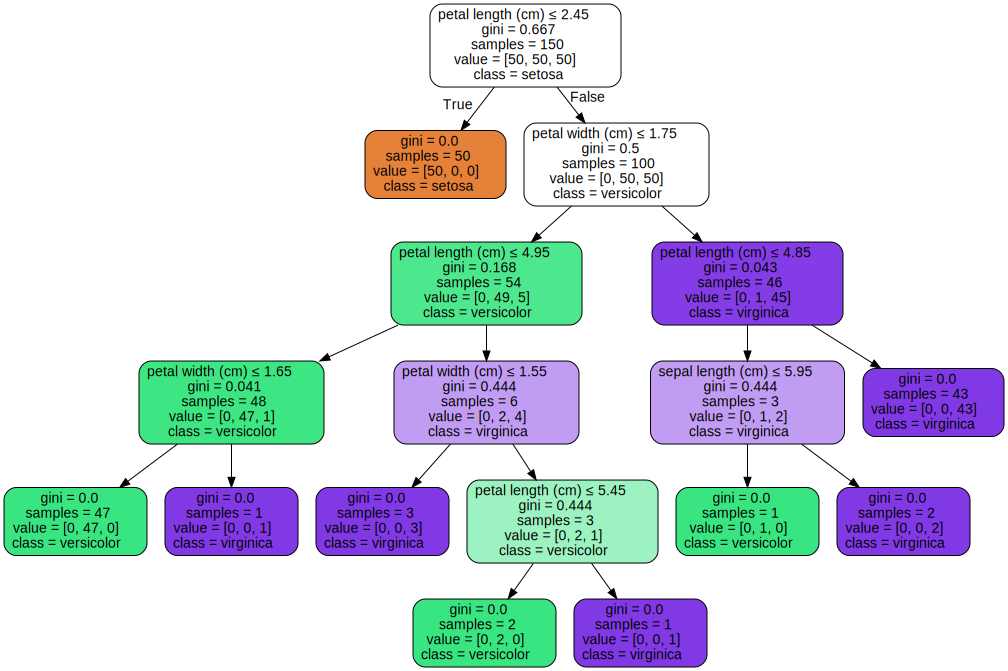

In [89]:
>>> dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
>>> graph = graphviz.Source(dot_data)  
>>> graph 